### ANS_1
(1) Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (3, 7). You can assume the start point to be (2, 5). Plot the function and its contours along with the minimum value in that direction. Is the search direction a gradient descent one? Comment on that as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(w):       # Function
    return (w[0]-10)**2+(w[1]-10)**2

In [3]:
def gradf(w):         #Gardiant of function f
    return np.array([2*(w[0]-10),2*(w[1]-10)])

In [4]:
w_0=np.array([2,5])  #Initial guess
p=np.array([3,7]) # Direction

In [5]:
# search direction a gradient descent one?
# ---------------yes----------------- 
if np.dot(gradf(w_0),p)<0:  
    print('Given direction P is the descent direction')

Given direction P is the descent direction


In [25]:
# Backtracking Algorithm to find the step length alpha
def phi(alpha):  # Unidirection function 
    return f(w_0+alpha*p)
a=0.1;b=2#Initial guess
n=20  #number of subintervals
delw=(b-a)/n
w_1=a
w_2=a+delw
w_3=w_2+delw
while phi(w_1)<phi(w_2) or phi(w_2)>phi(w_3):
    w_1=w_2
    w_2=w_3
    w_3=w_2+delw
    if w_3>b:
        print('Minimum does not lies in (a,b)')
        break
print("The minimum of function phi will lies in between {} and {}".format(w_1,w_3))

The minimum of function phi will lies in between 0.9549999999999998 and 1.1449999999999998


In [26]:
#Interval Halving 
a=w_1
b=w_3
L=(b-a)
epsilon=10**-4
w_m=(w_1+w_2)/2
w_1=a+L/4  
w_2=b-L/4
while abs(L)>epsilon:
    if f(w_0+w_1*p)<f(w_0+w_m*p):
        b=w_m
        w_m=w_1
    else:
        if f(w_0+w_2*p)<f(w_0+w_m*p):
            a=w_m
            w_m=w_2
        else:
            a=w_1
            b=w_2
    L=b-a
    w_1=a+L/4
    w_2=b-L/4
c=w_0+w_m*p   # point for minima in the direction of p
print('The value for alpha will be : ',w_m)
print("Minimum value of function along the given direction is :",f(w_0+w_m*p),'At the point',w_0+w_m*p)

The value for alpha will be :  1.0262499999999999
Minimum value of function along the given direction is : 28.987465625000006 At the point [ 5.07875 12.18375]


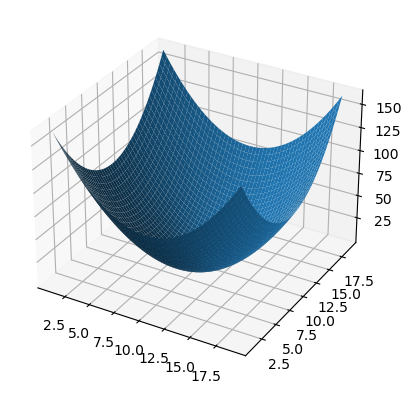

In [27]:
x=np.linspace(1,19,1000)
y=np.linspace(1,19,1000)
xx,yy=np.meshgrid(x,y)
zz=f(np.array([xx,yy]))
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,zz)
plt.show()

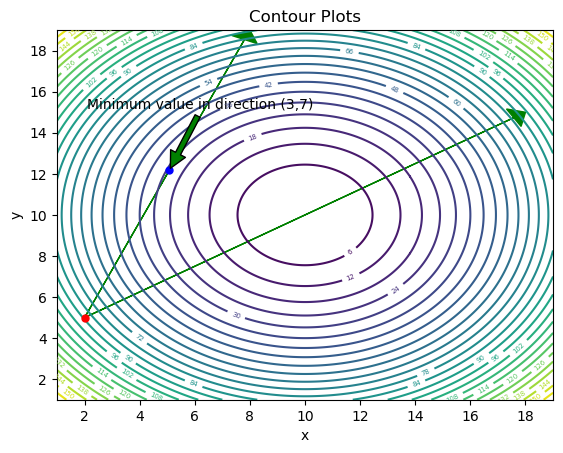

In [28]:
cp=plt.contour(xx,yy,zz,30)
plt.clabel(cp,fontsize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plots')
plt.arrow(x=2,y=5, dx=6, dy=14,head_width=1,head_length=0.5,length_includes_head=True,color='green') # in the direction of p
plt.arrow(x=2,y=5,dx=16,dy=10,head_width=1,head_length=0.5,length_includes_head=True,color='green')  # in the opposite direction of gradiant
plt.plot(2,5,color='red',marker='o',markersize=5)  #initial point
plt.plot(c[0],c[1],color='blue',marker='o',markersize=5) #Point for minimum
plt.annotate('Minimum value in direction (3,7)', xy=(c[0], c[1]), xytext=(c[0]-3, c[1]+3),
            arrowprops=dict(facecolor='green',shrink=0.03)) 
plt.show()